In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

In [1]:
from sqlFunctions import *

# Getting the galaxy data
getGalaxyData("REFL0100N1504")

In [4]:
databaseData = pd.read_csv("REFL0100N1504galaxyData.txt", names=["x", "y", "z", "gn", "sgn", "mass", "vx", "vy", "vz", "sfr", "id", "rg", "rs", "rp"])
#databaseData = databaseData[databaseData["mass"] > 3e9]

databaseData

,x,y,z,gn,sgn,mass,vx,vy,vz,sfr,id,rg,rs,rp
0,69.867409,55.204754,74.074989,57.0,30.0,1.050860e+08,-292.858032,31.249296,167.540497,0.000000,146738.0,0.000000,2.637457,2.606175
1,71.383774,67.511574,88.543808,58.0,18.0,2.672494e+09,32.049042,-8.977684,85.365845,0.099345,150575.0,2.066092,4.922085,4.921198
2,54.168182,46.353851,79.198006,60.0,7.0,2.658914e+10,99.269333,234.007553,-45.718800,0.000000,159349.0,0.000000,4.020640,4.020069
3,54.415527,46.614445,79.350975,60.0,28.0,1.243926e+08,76.252174,254.185425,-272.693573,0.000000,165072.0,0.000000,3.493557,3.421917
4,29.447783,22.824492,94.230431,62.0,6.0,6.131844e+09,470.273895,50.413124,571.840637,0.472960,174507.0,13.197575,4.707257,4.707887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40071,99.890747,71.352783,36.408176,46.0,74.0,1.541483e+08,183.644089,223.418869,446.103577,0.000000,51226777.0,0.000000,4.294229,4.220627
40072,99.906700,71.441818,36.487339,46.0,142.0,1.095594e+08,-182.545227,-387.803650,156.914597,0.000000,51230200.0,0.000000,3.855371,3.830885
40073,6.052103,53.058891,50.087139,50.0,45.0,2.530031e+08,-106.676819,1.371676,376.842499,0.000000,51262924.0,0.000000,5.004985,4.983383
40074,67.434235,30.910381,23.978352,51.0,38.0,1.200396e+09,-185.492752,174.737793,-145.680374,0.000000,51273419.0,0.000000,4.108054,4.088994


In [5]:
databaseData["sfrDensity"] = databaseData["sfr"] / (np.pi*databaseData["rp"]**2)
databaseData["sDensity"] = databaseData["mass"] / (np.pi*databaseData["rp"]**2)
databaseData["vRotation"] = (databaseData["mass"]/35)**(1/4)

In [22]:
d = databaseData[databaseData["id"] == galaxyData.iloc[410]["GalaxyID"]]
d["sfrDensity"].to_numpy()

array([], dtype=float64)

In [6]:
sfrDensities = []
sDensities = []
vRotations = []

for i in tqdm(range(210820)):
    data = databaseData[databaseData["id"] == galaxyData.iloc[i]["GalaxyID"]]

    if len(data) > 0:
        sfrDensities.append(data["sfrDensity"].to_numpy()[0])
        sDensities.append(data["sDensity"].to_numpy()[0])
        vRotations.append(data["vRotation"].to_numpy()[0])
    else:
        sfrDensities.append(0)
        sDensities.append(0)
        vRotations.append(0)

galaxyData["Star Formation Rate Density"] = sfrDensities
galaxyData["Stellar Density"] = sDensities
galaxyData["Rotation Velocity"] = vRotations
galaxyData.to_csv("galaxyData4.csv")

100%|██████████| 210820/210820 [00:54<00:00, 3856.51it/s]


In [46]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining the velocity bins 
velBins = 80
specBins = np.linspace(-500, 500, velBins, endpoint=True)
specBin = np.linspace(-500, 500, (velBins-1), endpoint=True)

# Defining the number of mass and sfr bins
binNum = 10

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Binning the velocity spectrum
galaxyData = binVelocities("linuxData/spectrum.txt", "linuxData/masses.txt", galaxyData, specBins)

100%|██████████| 210820/210820 [00:23<00:00, 8802.87it/s]


[       0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.         10180514.30303784
 42041757.88649808 33279506.95884155 39701293.51497959 43597944.1001852
  9531289.76713914 28526965.20204553 38888444.45209399 32278718.10692951
 21241048.32280505  3810377.29010683        0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
        0.                0.                0.                0.
  

Text(0, 0.5, 'Mass of Particles, Msun')

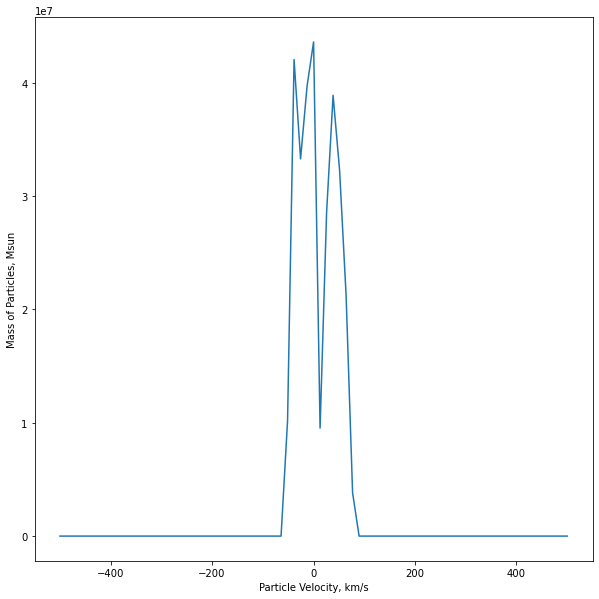

In [56]:
spectra = galaxyData["Spectra"]

plt.figure(figsize=(10,10))
plt.plot(specBin, spectra[2])

print(spectra[2])
plt.xlabel("Particle Velocity, km/s")
plt.ylabel("Mass of Particles, Msun")

In [1]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyData4.csv", delimiter=",")

galaxyData = massOutflowRates("linuxData/spectrum.txt", "linuxData/masses.txt", galaxyData)

FileNotFoundError: [Errno 2] No such file or directory: 'galaxyData4.csv'

In [8]:
galaxyData["Outflow Rates"] = galaxyData["Outflow Rates"] * (60*60*24*365)
galaxyData["Mass Loading Factor"] = galaxyData["Outflow Rates"] / galaxyData["Star Formation Rate"]

In [2]:
galaxyData.to_csv("galaxyData5.csv")

NameError: name 'galaxyData' is not defined

c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


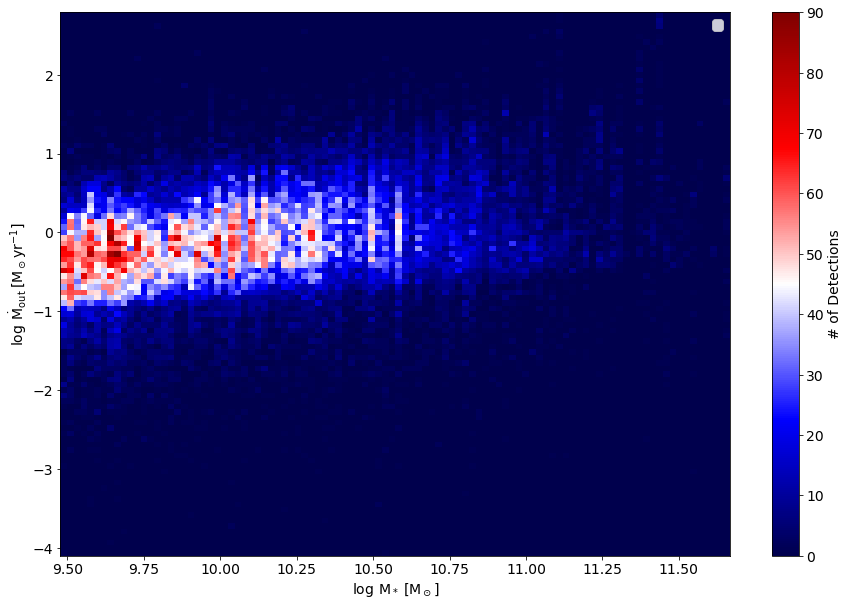

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyDataSave2.csv", delimiter=",")

# Removing null detections
galaxyData = removeNulls(galaxyData)

# Getting only galaxies with a net outflow/inflow
galaxyData = galaxyData[np.abs(galaxyData["Mass Outflow Rate"]) > 0]

# Extracting quantities we want
outflows = galaxyData["Mass Outflow Rate"].to_numpy()
mass = galaxyData["Mass"].to_numpy()

# Logging mass
mass = np.log10(mass)
outflows = np.log10(np.abs(outflows))

# Setting up the plot
plt.figure(figsize=(15,10))
plt.rcParams.update({"font.size": 14})
plt.hist2d(mass, outflows, bins=100, cmap="seismic")
plt.xlabel("$\\rm \log \: M_* \: [M_\odot]$")
plt.ylabel("$\\rm \log \: \dot{M}_{out} \: [M_\odot yr^{-1}]$")
plt.colorbar(label="# of Detections")
plt.legend()

(array([7.0000e+00, 4.0000e+00, 1.0000e+01, 1.0000e+01, 6.5000e+01,
        5.1518e+04, 3.6000e+01, 5.0000e+00, 5.0000e+00, 6.0000e+00]),
 array([-617.69272891, -503.51046693, -389.32820495, -275.14594298,
        -160.963681  ,  -46.78141902,   67.40084296,  181.58310493,
         295.76536691,  409.94762889,  524.12989087]),
 <BarContainer object of 10 artists>)

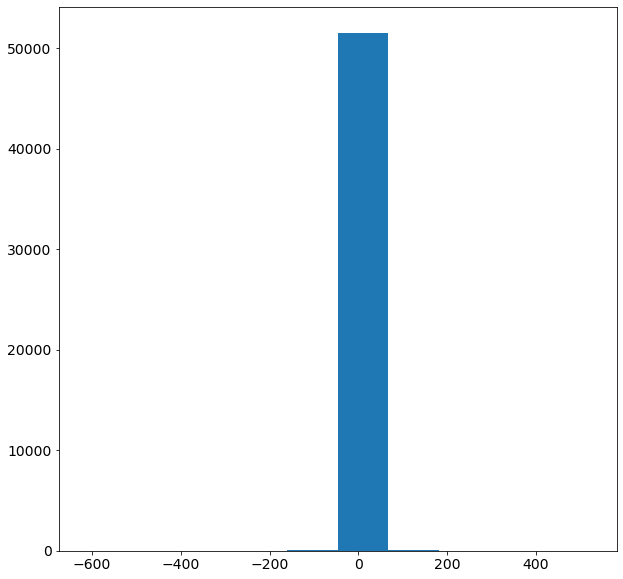

In [30]:
plt.figure(figsize=(10,10))
plt.hist(galaxyData["Mass Outflow Rate"])

In [16]:
galaxyData

,Unnamed: 0.1,Unnamed: 0,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles,Star Formation Rate Density,Stellar Density,Rotation Velocity,Mass Outflow Rate,Outflow Velocity,Mass Loading Factor
1,1,1,9350107.0,22198947840,0.507677,True,-12.514524376495122619,0.0,0.0,0.0,39.0,0.008152,3.564758e+08,147.420756,0.000000,0.0000,0.000000e+00
2,2,2,9350107.0,22198947840,0.507677,True,8.573287094334551391,30.0,0.0,30.0,59.0,0.008152,3.564758e+08,147.420756,0.000000,0.0000,0.000000e+00
3,3,3,9350107.0,22198947840,0.507677,True,16.036863580939614093,30.0,60.0,30.0,84.0,0.008152,3.564758e+08,147.420756,0.000000,0.0000,0.000000e+00
4,4,4,9350107.0,22198947840,0.507677,True,-0.4115273262551225886,30.0,120.0,30.0,55.0,0.008152,3.564758e+08,147.420756,0.000000,0.0000,0.000000e+00
5,5,5,9350107.0,22198947840,0.507677,True,-21.364549781384843135,30.0,180.0,30.0,29.0,0.008152,3.564758e+08,147.420756,0.000000,0.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210814,210814,210814,58335132.0,3317714944,0.425922,True,72.19370896272032229,150.0,180.0,30.0,12.0,0.034403,2.679791e+08,91.661150,0.000000,0.0000,0.000000e+00
210815,210815,210815,58335132.0,3317714944,0.425922,True,76.401857771780319055,150.0,240.0,30.0,10.0,0.034403,2.679791e+08,91.661150,0.000000,0.0000,0.000000e+00
210816,210816,210816,58335132.0,3317714944,0.425922,True,76.782788573521855345,150.0,300.0,30.0,16.0,0.034403,2.679791e+08,91.661150,0.373561,196.6002,1.125958e-10
210817,210817,210817,58335132.0,3317714944,0.425922,True,53.320609474870625383,150.0,360.0,30.0,32.0,0.034403,2.679791e+08,91.661150,0.000000,0.0000,0.000000e+00


Text(0, 0.5, '$\\rm \\Sigma_{SFR} [M_\\odot yr^{-1} kpc^{-2}]$')

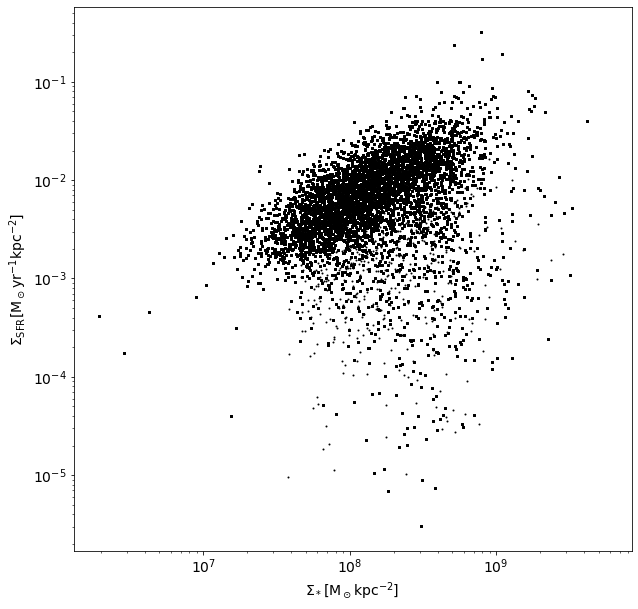

In [11]:
sDensity = galaxyData["Stellar Density"].to_numpy()
sfrDensity = galaxyData["Star Formation Rate Density"].to_numpy()

plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size": 14})
plt.plot(sDensity, sfrDensity, "ko", markersize=1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\\rm\Sigma_* [M_\odot kpc^{-2}]$")
plt.ylabel("$\\rm \Sigma_{SFR} [M_\odot yr^{-1} kpc^{-2}]$")

Text(0.5, 0, '$\\rm \\Sigma_{SFR} \\:[M_\\odot yr^{-1} kpc^{-2}]$')

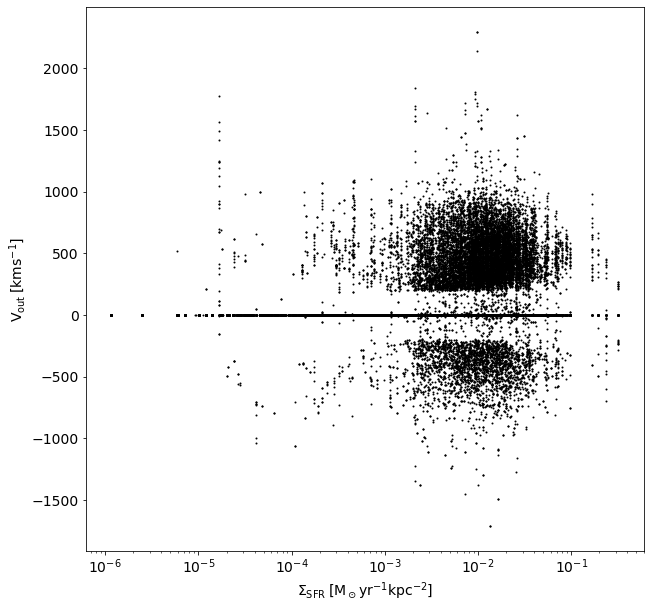

In [3]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyData5.csv", delimiter=",")

outflowVel = galaxyData["Outflow Velocity"].to_numpy()
sfrDensity = galaxyData["Star Formation Rate Density"].to_numpy()

plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size": 14})
plt.plot(sfrDensity, outflowVel, "ko", markersize=1)
plt.xscale("log")
#plt.yscale("log")
plt.ylabel("$\\rm V_{out}\: [kms^{-1}]$")
plt.xlabel("$\\rm \Sigma_{SFR} \:[M_\odot yr^{-1} kpc^{-2}]$")

Text(0.5, 0, '$\\rm M_* \\:[M_\\odot]$')

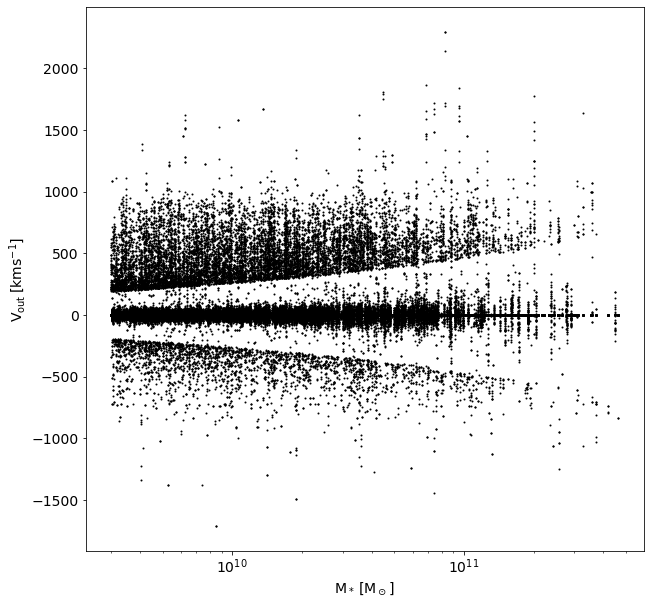

In [4]:
# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyData5.csv", delimiter=",")

outflowVel = galaxyData["Outflow Velocity"].to_numpy()
mass = galaxyData["Mass"].to_numpy()

plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size": 14})
plt.plot(mass, outflowVel, "ko", markersize=1)
plt.xscale("log")
#plt.yscale("log")
plt.ylabel("$\\rm V_{out}\: [kms^{-1}]$")
plt.xlabel("$\\rm M_* \:[M_\odot]$")

Text(0, 0.5, 'Frequency Density')

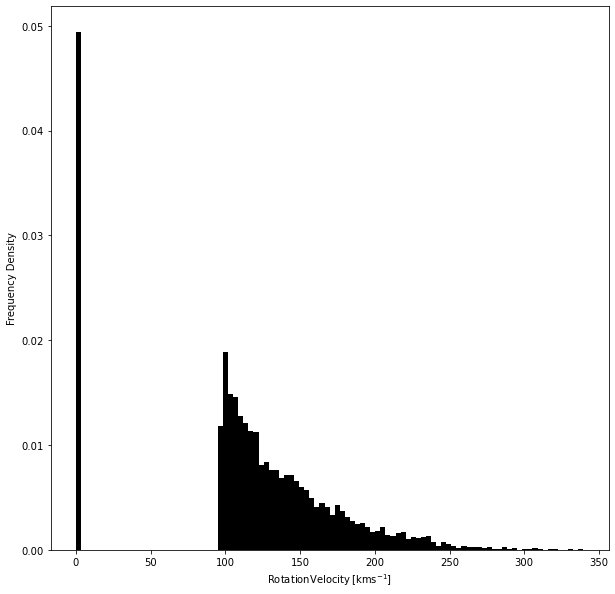

In [7]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyData5.csv", delimiter=",")

rotations = galaxyData["Rotation Velocity"].to_numpy()

plt.figure(figsize=(10,10))
_ = plt.hist(rotations, bins=100, density=True, color="k")
plt.xlabel("$\\rm Rotation Velocity \: [kms^{-1}]$")
plt.ylabel("Frequency Density")